In [2]:
pip install emnist

Note: you may need to restart the kernel to use updated packages.


D:\Programe\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.6607 - loss: 1.1497 - val_accuracy: 0.8934 - val_loss: 0.3228
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9071 - loss: 0.2824 - val_accuracy: 0.9189 - val_loss: 0.2504
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9268 - loss: 0.2150 - val_accuracy: 0.9170 - val_loss: 0.2497
Epoch 4/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9345 - loss: 0.1894 - val_accuracy: 0.9211 - val_loss: 0.2338
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9412 - loss: 0.1659 - val_accuracy: 0.9304 - val_loss: 0.2099
Epoch 6/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9472 - loss: 0.1453 - val_accuracy: 0.9289 - val_loss: 0.2234
Epoch 7/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9532 - loss: 0.1266 - val_accuracy: 0.9291 - val_loss: 0.2155
Epoch 8/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9548 -

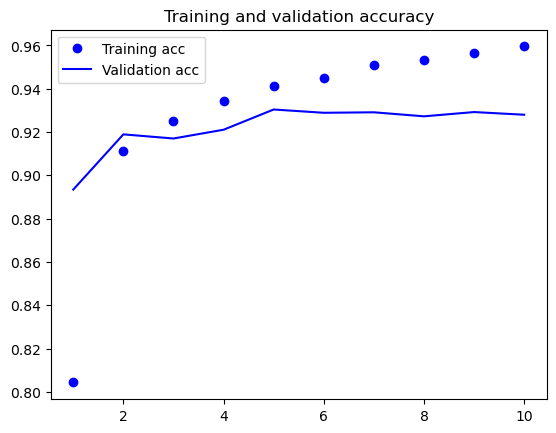

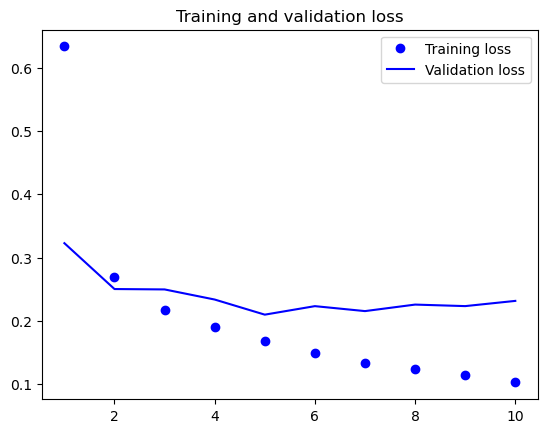

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Citirea datelor
training_letter = pd.read_csv('C:/Users/podar/OneDrive/Рабочий стол/Python/CN Pabd/1/emnist-letters-train.csv')
testing_letter = pd.read_csv('C:/Users/podar/OneDrive/Рабочий стол/Python/CN Pabd/1/emnist-letters-test.csv')

# Separarea datelor în imagini și etichete
y_train = np.array(training_letter.iloc[:, 0].values)
x_train = np.array(training_letter.iloc[:, 1:].values)

y_test = np.array(testing_letter.iloc[:, 0].values)
x_test = np.array(testing_letter.iloc[:, 1:].values)

# Preprocesarea datelor
train_images = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

# Transformarea etichetelor în one-hot encoding
num_classes = 37 # 26 litere + 10 cifre (aici folosim 37 pentru a avea loc pentru toate caracterele)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Separarea datelor de antrenare în set de antrenare și de validare
train_images, val_images, train_labels, val_labels = train_test_split(train_images, y_train, test_size=0.2, random_state=42)

# Definirea modelului CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compilarea modelului
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Antrenarea modelului
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), batch_size=64)

# Evaluarea modelului pe setul de date
test_loss, test_acc = model.evaluate(test_images, y_test)
print('Test accuracy:', test_acc)

# Plotarea acurateței și pierderii pe parcursul antrenării
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
